<a href="https://colab.research.google.com/github/lucasmanesco/airbnb_londres/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://logosmarcas.net/wp-content/uploads/2020/07/Airbnb-Emblema.jpg">

---

# Análise dos Dados do Airbnb - *Londres*

Com certeza todos nós já nos hospedamos em um imóvel ou conhecemos alguém que já utilizou a plataforma do [Airbnb](https://www.airbnb.com.br/).

O Airbnb, inaugurado em 2007, já é considerado como sendo a **maior empresa hoteleira da atualidade**, sem ao menos possuir um hótel. Hoje, já conta com mais de 4 milhões de anfitriões, ultrapassando inclusive a gigantesca rede de hóteis Marriot, que fundada em 1927, possui 1 milhão de quartos "apenas".

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, analiso os dados referentes à cidade de Londres, e seleciono alguns insights que podem ser extraídos a partir dos dados brutos.**

## Obtenção dos Dados

Todos os dados utilizados nesse notebook foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde encontram-se as cidades disponíveis e seus respectivos arquivos.

Para a análise exploratória importei o seguinte arquivo da cidade de Londres:

* `listings.csv` - *Summary information and metrics for listings in London (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-kingdom/england/london/2022-06-07/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria o código.

Pensando nisso, disponibilizo [aqui](https://drive.google.com/file/d/1Z_HSQ8qCVFm5PKMCMPmoIaKpENvVDdKB/view?usp=sharing) o conjunto que utilizei, para que você sempre consiga utilizar esse material.

In [ ]:
# importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2022-06-07/visualisations/listings.csv')

## Análise dos Dados

Nessa etapa o foco se concentra em identificar, coletar e analisar os dados que irei utilizar.

A metodologia **CRISP-DM** cita algumas técnicas utilizadas nessa etapa:
* *Data Selection*
* *Data Cleaning*
* *Data Construction*
* *Data Integration*
* *Data Formatting*

A análise de dados é um procedimento que visa transformar números e informações em insights para uma tomada de decisão.

Aproveito para listar abaixo as variáveis (colunas) utilizadas no  *DataSet* e suas respectivas atribuições:

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de avaliações nos últimos 12 meses
* `license` - número da licença/registro

Antes de iniciar qualquer análise, vou verificar a cara do *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2020-03-16,0.59,1,2,0,NaN
1,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,160,3,0,NaN,NaN,2,324,0,NaN
2,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,49,1,26,2022-05-22,0.18,2,341,5,NaN
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,379,4,49,2022-06-06,0.36,3,251,7,NaN
4,31361,"Restful Room, Friendly House, East London",134606,Cryn,NaN,Newham,51.53403,0.02709,Private room,33,1,118,2022-06-05,0.81,2,310,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Antes de tudo identifica-se quantas entradas possui o *DataFrame* e também o tipo dos dados de cada coluna.

Este *dataset* que baixei é a versão "resumida" do Airbnb. Na mesma página que baixei o arquivo `listings.csv`. Há uma versão mais completa com 66152 entradas e 74 variáveis (`listings.csv.gz`).

In [ ]:
# identificando o volume de dados do DataFrame
print(f'Entradas:\t{df.shape[0]}')
print(f'Colunas:\t{df.shape[1]}\n')

# verificando o tipo dos dados de cada coluna
df.dtypes

Entradas:	66152
Colunas:	18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Agora que já consigo ter a noção do tamanho e quais tipos de dados temos no *DataSet*, é necessário identificar se possui dados ausentes e o quanto eles representam no conjunto completo de dados. É fundamental entender se esses dados ausentes vão impactar na análise exploratória.

Essa quantidade de dados ausentes está diretamente ligada à qualidade do *DataSet*.


* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes, porém já tem a coluna `neighbourhood` com os dados suficientes para agrupar em bairros.
* A coluna `license` também possui 100% dos seus valores faltantes. Essa informação não impacta na análise.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 25% das entradas.
* As variáveis `name` e `host_name` têm menos de 1% dos valores nulos. Irrelevante para a análise.

In [ ]:
# ordenando em ordem decrescente a taxa de valores ausentes de cada variável
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.259403
last_review                       0.259403
name                              0.000333
host_name                         0.000091
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Resumidamente, um histograma é um gráfico de distribuição de frequência, e que permite analisar visualmente como uma amostra/população está distribuída.

Para identificar a distribuição das variáveis, irei plotar o histograma

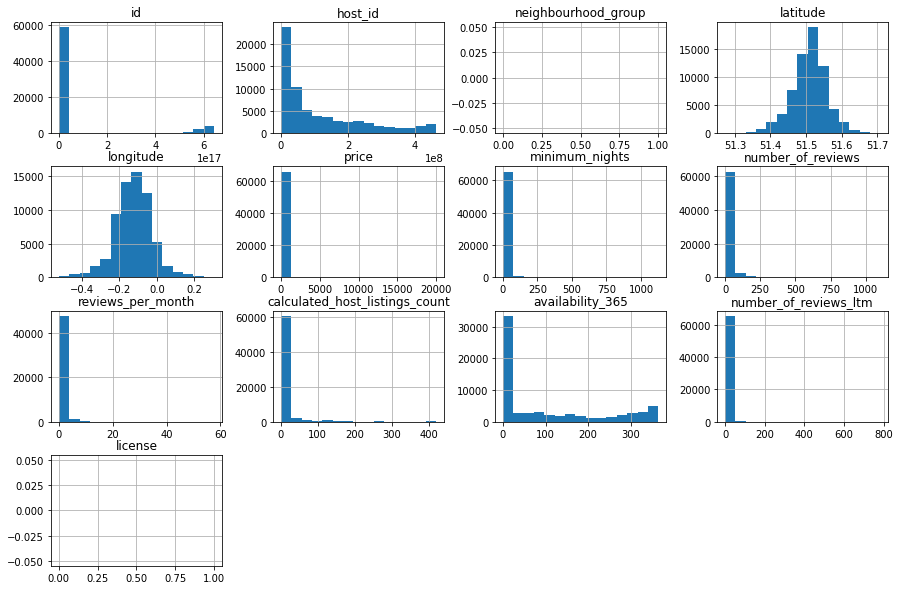

In [ ]:
# plotando o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.


Pela distribuição dos histogramas, pode-se identificar a presença de outliers em algumas variáveis: `price`, `minimun_nights`, `number of reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365` e `number_of_reviews_ltm`.

Para confirmar e analisar esses *outliers*, utilizei as ténicas abaixo:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# visualizando o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,66152.000000,66152.000000,66152.000000,48992.000000,66152.000000,66152.000000,66152.000000
mean,159.398159,6.828229,17.002902,0.737898,12.835107,101.618409,3.653722
std,396.233239,31.103361,39.416867,1.163752,44.979090,128.375969,10.893308
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,50.000000,1.000000,0.000000,0.100000,1.000000,0.000000,0.000000
50%,90.000000,2.000000,4.000000,0.340000,1.000000,22.000000,0.000000
75%,164.000000,4.000000,16.000000,0.930000,4.000000,193.000000,3.000000
max,20000.000000,1125.000000,1103.000000,57.670000,419.000000,365.000000,783.000000


Analisando o resumo estatístico acima, confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 164, porém seu valor máximo é 20000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

Valores "minimum_nights" acima de 30:	1318
% de ocorrência dos valores:		1.9924


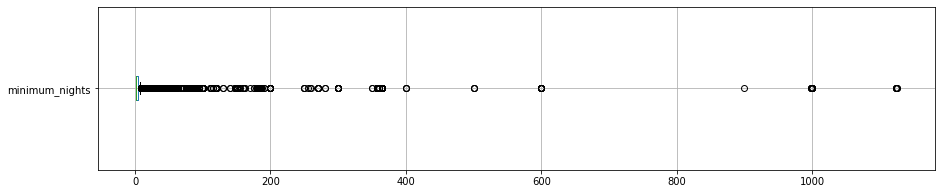

In [ ]:
# calculando a quantidade de valores acima de 30 dias para minimum_nights
print(f'Valores "minimum_nights" acima de 30:\t{len(df[df.minimum_nights > 30])}')
print(f'% de ocorrência dos valores:\t\t{(len(df[df.minimum_nights > 30]) / df.shape[0]*100):.4f}')

# plotando um boxplot da variável minimum_nights
df.boxplot(['minimum_nights'], vert=False, figsize=(15, 3))

#### Boxplot para price

Valores "price" acima de 350:	4564
% de ocorrência dos valores:	6.8993


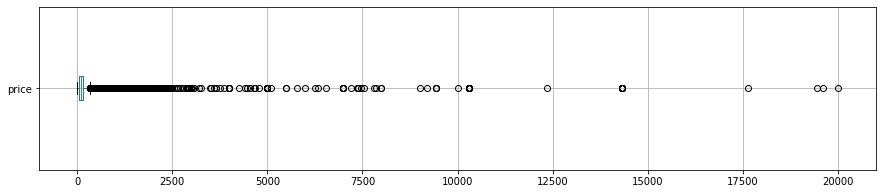

In [ ]:
# calculando a quantidade de valores acima de 300 para price
print(f'Valores "price" acima de 350:\t{len(df[df.price > 350])}')
print(f'% de ocorrência dos valores:\t{(len(df[df.price > 350]) / df.shape[0]*100):.4f}')

# plotando um boxplot da variável price
df.boxplot(['price'], vert=False, figsize=(15, 3))

#### Histogramas sem *outliers*

Identificando os *outliers* nas variáveis `price` e `minimum_nights`, agora "limpo" o *DataFrame* delas e plota-se novamente o histograma.

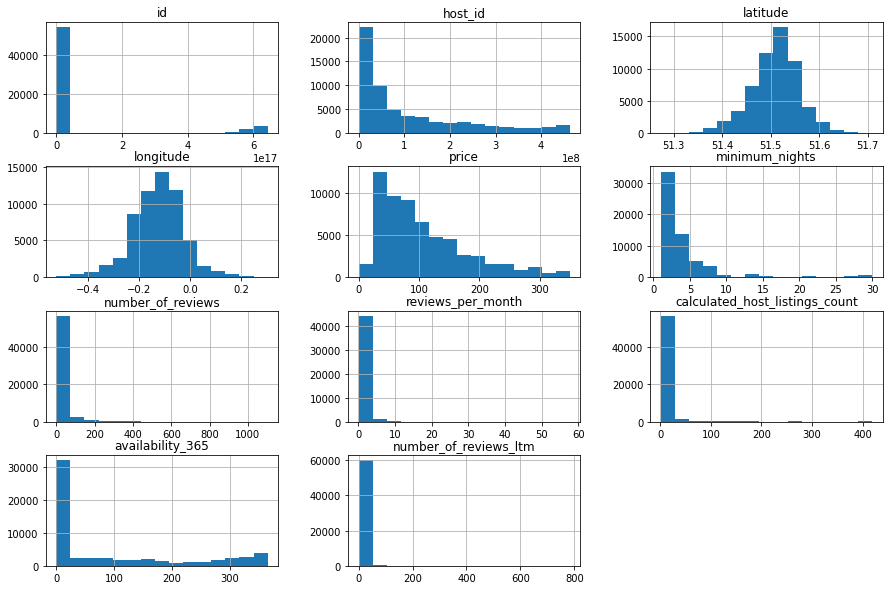

In [ ]:
# removendo os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 350].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# removendo 'neighbourhood_group' e 'license', pois estão vazios e são irrelevantes para a análise
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('license', axis=1, inplace=True)

# plotando os novos histogramas para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

Agora com o DataFrame composto de dados mais limpos, após remoção dos outliers, é possível obtermos algumas informações simples porém valiosas.

In [ ]:
# calculando a média da coluna `price``
print(f'Média dos preços dos imóveis do Airbnb em Londres: {df_clean.price.mean():.2f}')

Média dos preços dos imóveis do Airbnb em Londres: 106.51


### **Q6. Qual a correlação existente entre as variáveis**

A correlação pode ser uma técnica estatística que mostrará se e de que forma os pares de variáveis estão fortemente relacionados.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [ ]:
# criando uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# exibindo a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.082620,-0.043229,0.061131,0.106710,0.215252
minimum_nights,0.082620,1.000000,-0.074086,-0.119663,0.018138,0.052350
number_of_reviews,-0.043229,-0.074086,1.000000,0.519539,-0.038929,0.071424
reviews_per_month,0.061131,-0.119663,0.519539,1.000000,-0.001374,0.248875
calculated_host_listings_count,0.106710,0.018138,-0.038929,-0.001374,1.000000,0.136689
availability_365,0.215252,0.052350,0.071424,0.248875,0.136689,1.000000


Para uma visualização mais agradável e compreensível visualmente, utilizei um *heatmap*, que mostra de forma bidimensional e colorida a magnitude de cada valor numérico.

Nós seres humanos somos aprendizes visuais, portanto, visualizar os dados de qualquer forma gráfica visual faz mais sentido. Os *heatmaps* representam dados de forma fácil de entender, podem descrever a densidade ou intensidade das variáveis, visualizar padrões, variância e até anomalias.

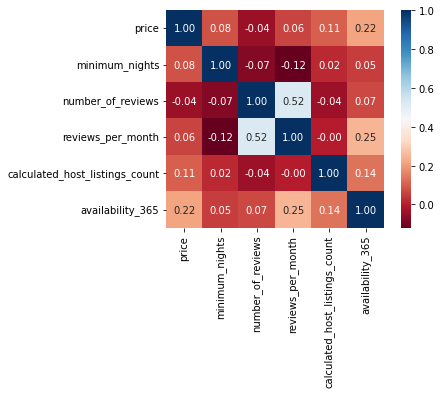

In [ ]:
# plotando um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

Os anfitriões no Airbnb oferecem uma grande variedade de acomodações, desde quartos compartilhados até ilhas particulares. Existem quatro tipos de acomodações: lugares inteiros, quartos inteiros, quartos de hotel e quartos compartilhados.

Utilizei o método `value_counts()` para contar a quantidade de ocorrências de cada tipo.

Text(0.5, 1.0, 'Tipos de Imóveis - Airbnb Londres')

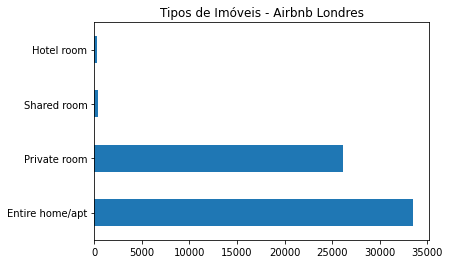

In [ ]:
# mostrando a quantidade de cada tipo de imóvel disponível em um gráfico de barras
df_clean.room_type.value_counts().plot(kind='barh')
plt.title('Tipos de Imóveis - Airbnb Londres')

In [ ]:
# calculando a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.555986
Private room       0.433905
Shared room        0.006463
Hotel room         0.003646
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# visualizando a média dos 10 bairros mais caros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
City of London            176.008596
Kensington and Chelsea    158.693895
Westminster               150.856885
Camden                    126.292823
Hammersmith and Fulham    117.389903
Richmond upon Thames      116.362715
Wandsworth                110.069044
Islington                 106.737385
Merton                    100.652805
Southwark                  99.206916
Name: price, dtype: float64

Os gráficos de dispersão ou Scatter plot são representações gráficas do relacionamento entre duas variáveis numéricas. O Scatter plot utiliza pontos para representar essa relação, cada ponto representa o valor de uma variável no eixo horizontal e o valor de outra variável no eixo vertical.

Ao relacionar a latitude com a longitude no gráfico de dispersão, pode-se localizar geograficamente todos imóveis cadastrados em Londres e ainda visualizar o preço através da legenda colorida.

Pode-se notar que os aluguéis mais caros encontram-se mais no centro da cidade, como foi visualizado no item anterior, ao calular a média dos 10 bairros mais caros.

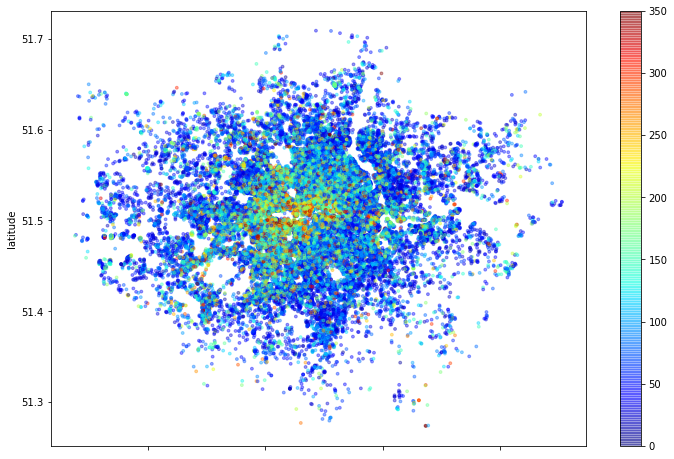

In [ ]:
# plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Com o método `mean()`foi possível calcuar que a média do mínimo de noites para uma estadia não passa de 4 noites.

In [ ]:
# visualizando a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

3.7404258844974727

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Através de uma rápida análise, já é possível ajudar alguém que esteja planejando uma viagem para Londres. Essa pessoa terá uma noção do custo de estadia e poderá optar entre economizar com estadia ou transporte, sendo que os aluguéis mais caros estão mais próximos do centro da cidade e dos pontos turísticos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 74 atributos disponíveis.